# Random Forest Model

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
df = pd.read_csv('random_forest_ready.csv')

In [21]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, oob_score=True, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


In [7]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80       123
         1.0       0.64      0.67      0.65        69

    accuracy                           0.74       192
   macro avg       0.72      0.73      0.73       192
weighted avg       0.75      0.74      0.75       192

[[97 26]
 [23 46]]


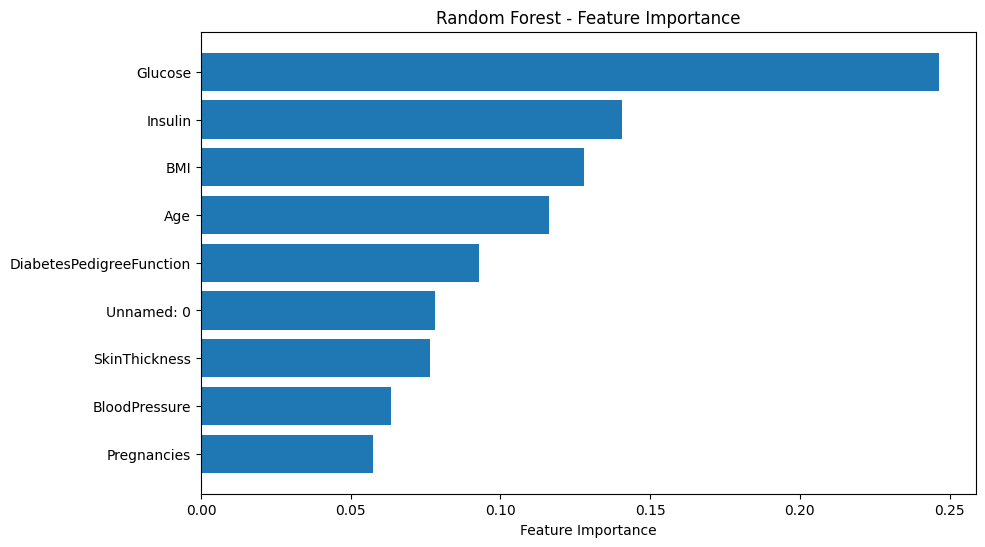

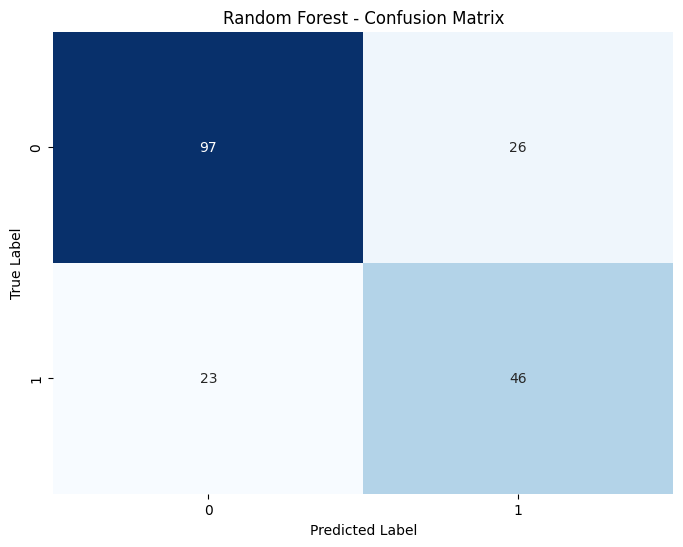

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Feature Importance
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Sort features based on importance
sorted_idx = feature_importance.argsort()

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest - Confusion Matrix')
plt.show()

# Logistic Regression Model 

In [13]:
from sklearn.linear_model import LogisticRegression

In [9]:
df = pd.read_csv('log_reg_ready.csv')

In [10]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


C:\Users\ellis\anaconda3\envs\THEpython3.9\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77        59
         1.0       0.72      0.78      0.75        49

    accuracy                           0.76       108
   macro avg       0.76      0.76      0.76       108
weighted avg       0.76      0.76      0.76       108

[[44 15]
 [11 38]]


In [17]:
coef_magnitudes = abs(logreg_model.coef_[0])
feature_names = X.columns
sorted_idx = coef_magnitudes.argsort()

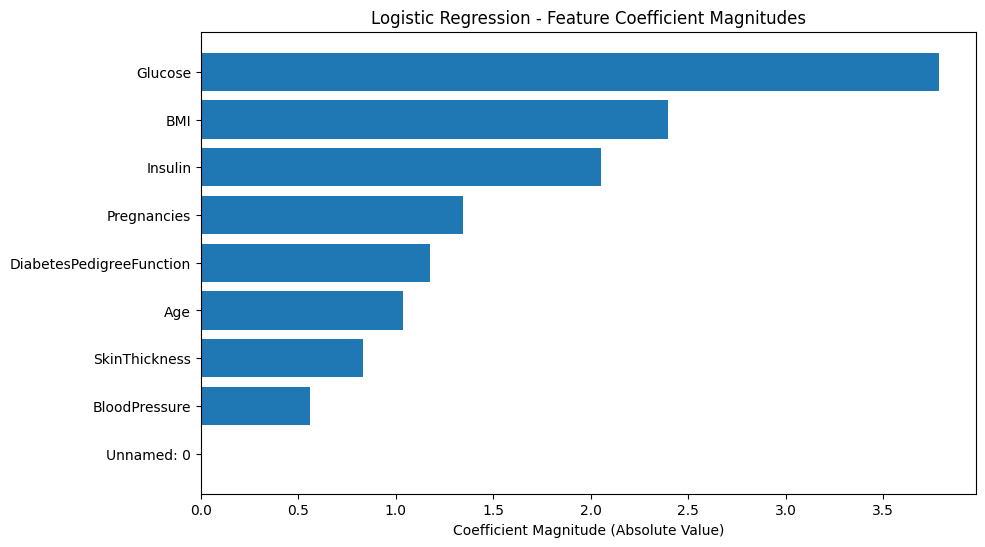

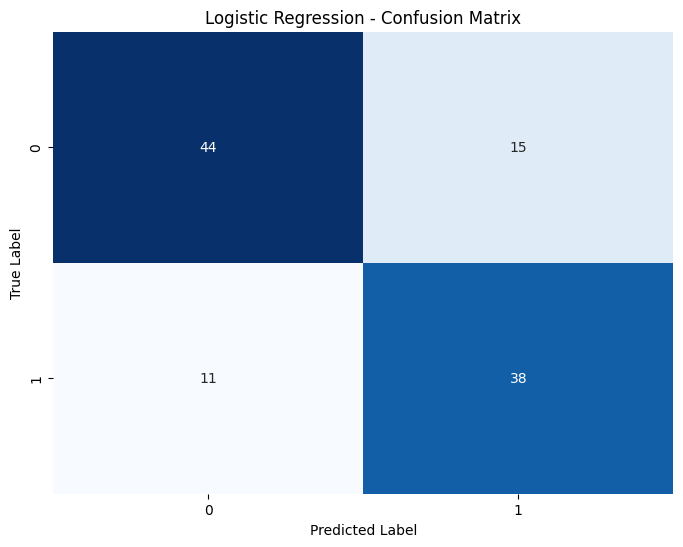

In [18]:
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), coef_magnitudes[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel('Coefficient Magnitude (Absolute Value)')
plt.title('Logistic Regression - Feature Coefficient Magnitudes')
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()